In [205]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [206]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [207]:
df1.shape

(13320, 9)

In [208]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [209]:
df1['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [210]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [211]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [212]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [213]:
df2.shape 

(13320, 5)

In [214]:
df3=df2.dropna()
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [215]:
df3.shape

(13246, 5)

In [216]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [217]:
df3.loc[:, 'BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_13744\1366504729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [218]:
df3.head()

location       size total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [219]:
df3.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [220]:
df3[df3.BHK>20]

location        size total_sqft  bath  price  BHK
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [221]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [222]:
def is_float(x):
    try:
        float(x) 
        return True
    except(ValueError, TypeError):
        return False 

In [223]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  BHK
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [224]:
def convert_sqft_to_num(x): 
    tokens = x.split('-')
    if len(tokens) == 2:
        try:
            return (float(tokens[0])+float(tokens[1]))/2
        except ValueError:
            return None
    try:
        return float(x) 
    except ValueError:
        return None 
    
result = convert_sqft_to_num('2100 - 2850')
print(result)

2475.0


In [225]:
convert_sqft_to_num('34.46Sq. Meter') 
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num) 
df4

location       size  total_sqft  bath   price  BHK
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2
...                         ...        ...         ...   ...     ...  ...
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00    5
13316             Richards Town      4 BHK      3600.0   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4
13319              Doddathoguru      1 BHK       550.0   1.0   17.00    1

[13246 rows x 6 columns]

In [226]:
df4 = df4[df4.total_sqft.notnull()] 
df4

location       size  total_sqft  bath   price  BHK
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2
...                         ...        ...         ...   ...     ...  ...
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00    5
13316             Richards Town      4 BHK      3600.0   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4
13319              Doddathoguru      1 BHK       550.0   1.0   17.00    1

[13200 rows x 6 columns]

In [227]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [228]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] 
df5.head()

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [229]:
df5_stats = df5['price_per_sqft'].describe() 
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [230]:
df5.to_csv("bhp.csv",index=False)

In [231]:
df5.location = df5.location.apply(lambda x: x.strip()) 
location_stats = df5['location'].value_counts(ascending=False) 
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [232]:
len(location_stats[location_stats>10])

240

In [233]:
len(location_stats) 

1287

In [234]:
len(location_stats[location_stats<=10])

1047

In [235]:
location_stats_less_than_10 = location_stats[location_stats<=10] 
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [236]:
len(df5.location.unique())

1287

In [237]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x) 
len(df5.location.unique())

241

In [238]:
df5.head(10)

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [239]:
df5[df5.total_sqft/df5.BHK<300].head()

location       size  total_sqft  bath  price  BHK  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [240]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)] 
df6.shape

(12456, 7)

In [241]:
df6.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'BHK',
       'price_per_sqft'],
      dtype='object')

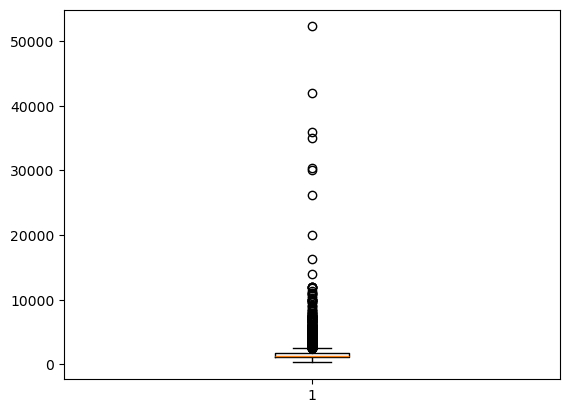

In [242]:
plt.boxplot(df6['total_sqft']) 
plt.show()

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_13744\3656786791.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


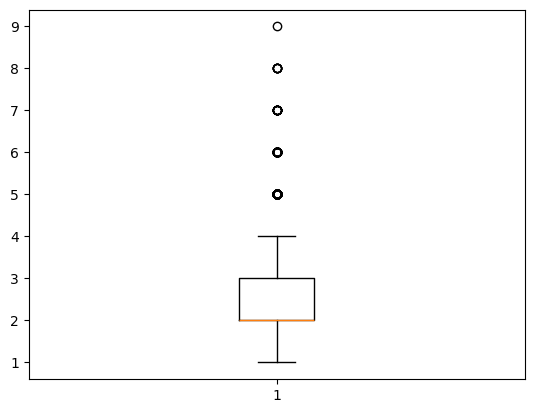

In [243]:
Q1 = np.percentile(df6['total_sqft'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['total_sqft'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['total_sqft'] > ul].index.tolist() 
lower_outliers = df6[df6['total_sqft'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['bath']) 
plt.show()

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_13744\1468463763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


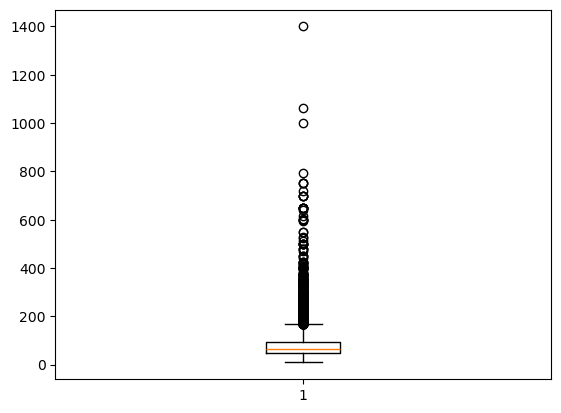

In [244]:
Q1 = np.percentile(df6['bath'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['bath'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bath'] > ul].index.tolist() 
lower_outliers = df6[df6['bath'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')
plt.boxplot(df6['price']) 
plt.show()

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_13744\1990356000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


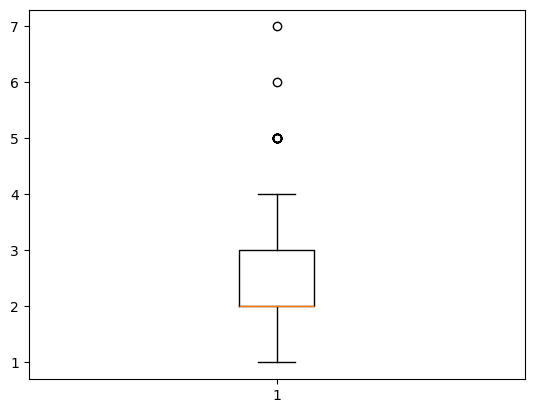

In [245]:
Q1 = np.percentile(df6['price'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['price'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
 
upper_outliers = df6[df6['price'] > ul].index.tolist() 
lower_outliers = df6[df6['price'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['BHK']) 
plt.show()

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_13744\2049604625.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


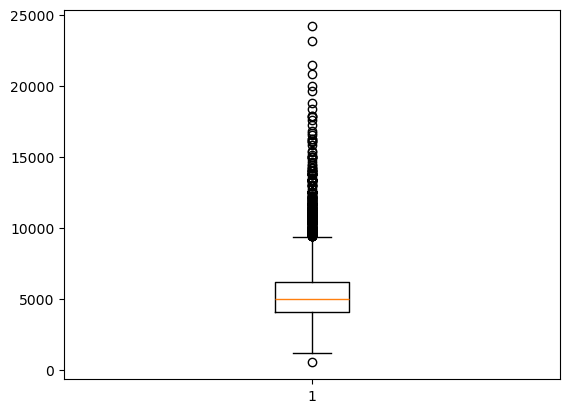

In [246]:
Q1 = np.percentile(df6['BHK'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['BHK'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['BHK'] > ul].index.tolist() 
lower_outliers = df6[df6['BHK'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['price_per_sqft']) 
plt.show()

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_13744\184963371.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


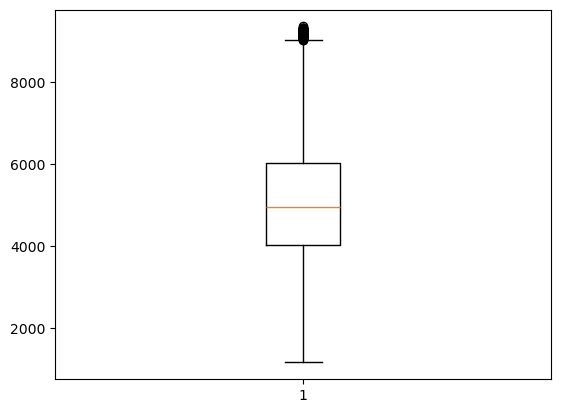

In [247]:
Q1 = np.percentile(df6['price_per_sqft'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['price_per_sqft'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['price_per_sqft'] > ul].index.tolist() 
lower_outliers = df6[df6['price_per_sqft'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True 
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['price_per_sqft']) 
plt.show()

In [248]:
df6.shape

(10090, 7)

In [249]:
X = df6.drop(['price'],axis='columns') 
X.head(3)

location   size  total_sqft  bath  BHK  price_per_sqft
0  Electronic City Phase II  2 BHK      1056.0   2.0    2     3699.810606
2               Uttarahalli  3 BHK      1440.0   2.0    3     4305.555556
3        Lingadheeranahalli  3 BHK      1521.0   3.0    3     6245.890861

In [250]:
X.shape 

(10090, 6)

In [251]:
y = df6.price 
y.head(3)

0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

In [252]:
len(y)

10090

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

X_train.shape 

(8072, 6)

In [254]:
y_train.shape 

(8072,)

In [255]:
X_test.shape 

(2018, 6)

In [256]:
y_test.shape 

(2018,)